# Tutorial 6 - Python For Data Analysis 🐍 

---

## Tensorflow 💫

TensorFlow is a Python library for fast numerical computing created and released by Google researchers to run machine learning, deep learning and other statistical and predictive analytics workloads. It can train and run deep neural networks for handwritten digit classification, image recognition, word embeddings, recurrent neural networks, sequence-to- sequence models for machine translation, natural language processing, and PDE (partial differential equation) based simulations.

## Learning resources

Neural network introduction : https://www.youtube.com/watch?v=aircAruvnKk&t=978s

Gradient descent and neural networks learning : https://www.youtube.com/watch?v=IHZwWFHWa-w

Backpropagation explained : https://www.youtube.com/watch?v=Ilg3gGewQ5U

Slides : https://github.com/m2dsupsdlclass/lectures-labs + repo github 

Tensorflow quickstart : https://www.tensorflow.org/tutorials/quickstart/beginner

### 1) Install tensorflow

In [ ]:
#!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### 2) Load and return the fashion_mnist dataset from keras.datasets

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(train_X,train_Y),(test_X,test_Y) = fashion_mnist.load_data()

### 3) Split the data into training data and testing data

In [ ]:
print("Shape of train data ", train_X.shape, train_Y.shape)
print("Shape of test data ", test_X.shape, test_Y.shape)

Shape of train data  (60000, 28, 28) (60000,)
Shape of test data  (10000, 28, 28) (10000,)


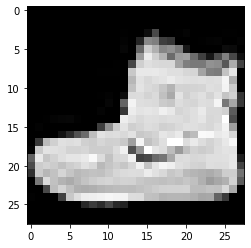

In [ ]:
plt.imshow(train_X[0,:,:], cmap='gray')
plt.show()

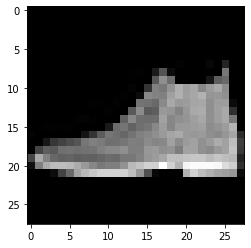

In [ ]:
plt.imshow(test_X[0,:,:], cmap='gray')
plt.show()

### 4) Define a list of the class name and pre-process images

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#Mettre de la forme entre 0 et 1
train_X = train_X / 255.
test_X = test_X / 255.

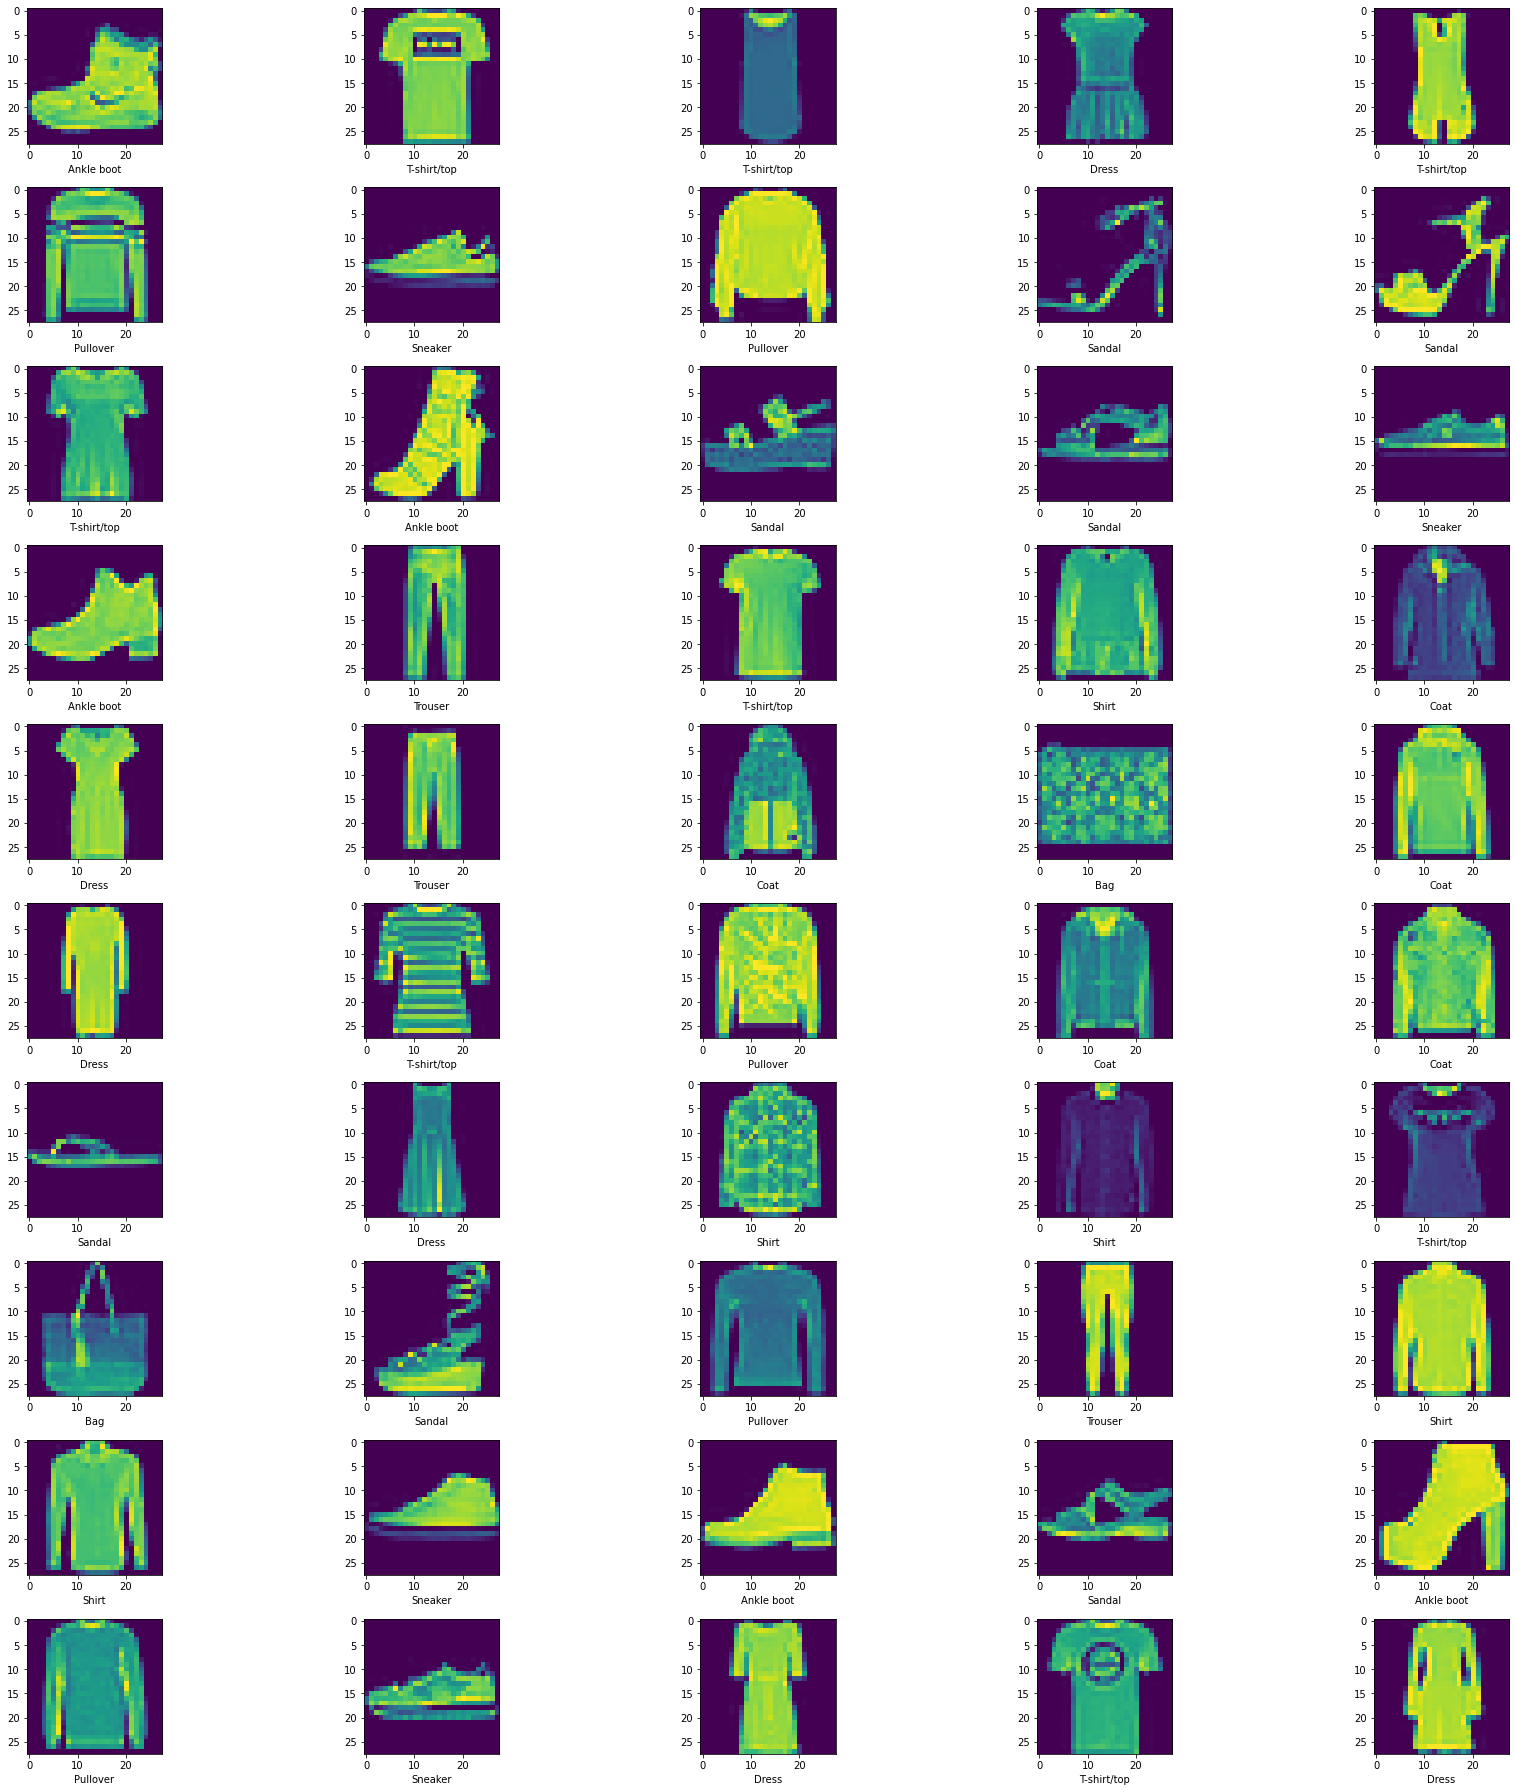

In [ ]:
plt.figure(figsize=(25,25))
n_rows,n_cols = 10,5
for row in range(n_rows):
  for col in range(n_cols):
    i = row * n_cols + col
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(train_X[i])
    plt.xlabel(class_names[train_Y[i]])
plt.tight_layout()
plt.show()

### 5) Create a neural network model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 6) Train the model

In [ ]:
predictions = model(train_X[:1]).numpy()
predictions

array([[0.08416426, 0.16880889, 0.11176866, 0.2426325 , 0.07992707,
        0.04840689, 0.16551413, 0.01839676, 0.02937585, 0.05100495]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.0981947 , 0.10686827, 0.10094307, 0.11505618, 0.09777951,
        0.09474555, 0.10651673, 0.09194447, 0.0929595 , 0.09499203]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(train_Y[:1], predictions).numpy()

2.3539622

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_Y, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5304 - accuracy: 0.8114
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4030 - accuracy: 0.8537
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3697 - accuracy: 0.8655
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3475 - accuracy: 0.8734
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3309 - accuracy: 0.8772
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3178 - accuracy: 0.8831
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3082 - accuracy: 0.8847
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2999 - accuracy: 0.8889
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2895 - accuracy: 0.8926
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2848 - accurac

### 7) Test the model

In [ ]:
pred = model.predict(test_X)
pred = pred.argmax(axis=1)
pred

array([9, 2, 1, ..., 8, 1, 5])

### 8) Analyze the results : predict, calculate the loss, plot the first X test images, their predicted labels, and the true labels, color correct predictions in blue and incorrect predictions in red.

In [ ]:
model.evaluate(test_X,  test_Y, verbose=2)

313/313 - 0s - loss: 0.3348 - accuracy: 0.8805 - 364ms/epoch - 1ms/step


[0.33477458357810974, 0.8805000185966492]

The model is 88% accurate and the lost is 32%, so there was 88% of good predictions